# Importing the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('IMDb Movies India.csv',encoding='latin1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.shape

(15509, 10)

In [6]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Drop columns that are not useful for analysis

In [7]:
df = df.drop(columns=['Name', 'Actor 2', 'Actor 3'])
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(5746, 7)

# Handling Columns

In [10]:
df['Year'].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1996)', '(1999)', '(1973)', '(1968)',
       '(1982)', '(1977)', '(1950)', '(1969)', '(1948)', '(1990)',
       '(1989)', '(2001)', '(2000)', '(1953)', '(1978)', '(1963)',
       '(1992)', '(1976)', '(1984)', '(1986)', '(1966)', '(1975)',
       '(1980)', '(1967)', '(1970)', '(1952)', '(1972)', '(1971)',
       '(1964)', '(1954)', '(1962)', '(1957)', '(1965)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [24]:
def handleYear(value):
    value = str(value).strip('()')
    return int(value)
df['Year'] = df['Year'].apply(handleYear)
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [11]:
df['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '52 min', '89 min', '112 min',
       '143 min', '177 min', '117 min', '123 min', '72 min', '154 min',
       '175 min', '153 min', '78 min', '139 min', '133 min', '180 min',
       '46 min', '164 min', '162 min', '171 min', '160 min', '152 min',
       '163 min', '165 min', '141 min', '129 min', '156 min', '240 

In [12]:
def handleDuration(value):
    value=str(value).split(' ')
    value=value[0]
    return int(value)
df['Duration']=df['Duration'].apply(handleDuration)
df['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [13]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [14]:
def split_genre_column(df,Genre):
   
    df['Genre1'] = df[Genre].str.split(',', expand=True)[0]
    df['Genre2'] = df[Genre].str.split(',', expand=True)[1]
    df['Genre3'] = df[Genre].str.split(',', expand=True)[2]
    return df

split_genre_column(df,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,(2005),142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,(2015),115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,(2001),153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,(1989),125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,(1999),129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [15]:
df.isna().sum()

Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Genre1         0
Genre2      1717
Genre3      3412
dtype: int64

In [16]:
df = df.fillna(0)
df.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [17]:
df["Genre1"].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Musical', 'Romance', 'Fantasy', 'Sci-Fi', 'Family', 'History',
       'Animation', 'War', 'Music'], dtype=object)

In [18]:
x,y = pd.factorize(df["Genre1"])
print(len(x))
print(np.unique(x))

5746
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [19]:
G=['Genre1','Genre2','Genre3']
for x in G:
    df[x],_ = pd.factorize(df[x])
    
df = df.drop(columns=['Genre'])
df.head(3)

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,(2019),109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0
3,(2019),110,4.4,35,Ovais Khan,Prateik,1,1,0
5,(1997),147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1


In [20]:
df['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [21]:
def handleVotes(value):
    value = str(value).replace(',','')
    return int(value)
df['Votes'] = df['Votes'].apply(handleVotes)
df['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

# Feature Engineering

## Release Year Features

In [25]:
df['MovieAge'] = 2024 - df['Year']
df['MovieAge'] 

1         5
3         5
5        27
6        19
8        12
         ..
15493     9
15494    23
15503    35
15505    25
15508    26
Name: MovieAge, Length: 5746, dtype: int64

## Director and Actor Popularity

In [26]:
DirectorCounts =df['Director'].value_counts()
print(DirectorCounts)
DirectorCounts.index[0:10]  # TOp 10 directors

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          33
Hrishikesh Mukherjee    33
                        ..
Manav Kaul               1
Sajeev Balath            1
Sriram Raja              1
Randeep Jha              1
Mozez Singh              1
Name: Director, Length: 2489, dtype: int64


Index(['David Dhawan', 'Mahesh Bhatt', 'Ram Gopal Varma', 'Shakti Samanta',
       'Hrishikesh Mukherjee', 'Vikram Bhatt', 'Priyadarshan',
       'Rama Rao Tatineni', 'Basu Chatterjee', 'Shyam Benegal'],
      dtype='object')

In [27]:
DirectorCounts =df['Director'].value_counts()
df['DirectorPopularity']= df['Director'].map(DirectorCounts)
ActorCounts= df['Actor 1'].value_counts() 
df['ActorPopularity']=df['Actor 1'].map(ActorCounts) 

## Log Transformation of Votes

In [28]:
df['LogVotes']=np.log1p(df['Votes'])
df['LogVotes'] 

1        2.197225
3        3.583519
5        6.719013
6        6.991177
8        5.789960
           ...   
15493    6.013715
15494    7.311218
15503    3.806662
15505    6.486161
15508    3.044522
Name: LogVotes, Length: 5746, dtype: float64

## Historical Average Ratings

In [29]:
df.groupby("Director")["Rating"].mean()

Director
A. Bhimsingh      6.785714
A. Jagannathan    5.833333
A. Majid          5.700000
A. Muthu          3.000000
A. Salaam         5.575000
                    ...   
Zia Sarhadi       6.366667
Ziaullah Khan     5.600000
Zoya Akhtar       6.800000
Zubair Khan       5.400000
Zunaid Memon      6.400000
Name: Rating, Length: 2489, dtype: float64

In [30]:
DirectorAvgRating = df.groupby('Director')['Rating'].mean()
df['DirectorAvgRating'] = df['Director'].map(DirectorAvgRating)

ActorAvgRating = df[['Actor 1']].stack().reset_index(name='Actor')
ActorAvgRating = ActorAvgRating.merge(df[['Rating']], left_on='level_0', right_index=True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
df['ActorAvgRating'] = df['Actor 1'].map(ActorAvgRating) 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5746 entries, 1 to 15508
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                5746 non-null   int64  
 1   Duration            5746 non-null   int64  
 2   Rating              5746 non-null   float64
 3   Votes               5746 non-null   int64  
 4   Director            5746 non-null   object 
 5   Actor 1             5746 non-null   object 
 6   Genre1              5746 non-null   int64  
 7   Genre2              5746 non-null   int64  
 8   Genre3              5746 non-null   int64  
 9   MovieAge            5746 non-null   int64  
 10  DirectorPopularity  5746 non-null   int64  
 11  ActorPopularity     5746 non-null   int64  
 12  LogVotes            5746 non-null   float64
 13  DirectorAvgRating   5746 non-null   float64
 14  ActorAvgRating      5746 non-null   float64
dtypes: float64(4), int64(9), object(2)
memory usage: 847.3

# Visualization

## Director Influence on Ratings

In [32]:
df[df["Director"].isin(df['Director'].value_counts().index[0:10])]

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,DirectorPopularity,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating
22,2021,105,4.4,63,Ram Gopal Varma,Mithun Chakraborty,2,5,0,3,34,93,4.158883,5.491176,5.336559
38,2008,138,6.4,3100,Vikram Bhatt,Rajniesh Duggall,2,3,4,16,30,5,8.039480,4.803333,5.120000
41,2018,144,4.5,1069,Vikram Bhatt,Zareen Khan,2,3,4,6,30,2,6.975414,4.803333,4.050000
239,1990,180,4.8,101,David Dhawan,Sunny Deol,3,2,0,34,41,53,4.624973,5.226829,5.094340
275,1987,116,5.5,281,Mahesh Bhatt,Raj Babbar,0,0,0,37,39,20,5.641907,5.753846,5.755000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15235,1999,148,4.4,263,Mahesh Bhatt,Saif Ali Khan,3,10,4,25,39,24,5.575949,5.753846,5.533333
15290,1982,136,6.5,34,Rama Rao Tatineni,Kamal Haasan,3,10,8,42,23,31,3.555348,5.360870,6.709677
15311,2001,175,5.7,803,Priyadarshan,Sunil Shetty,1,2,0,23,29,29,6.689599,6.296552,4.575862
15341,1998,125,7.9,3007,Mahesh Bhatt,Ajay Devgn,0,0,0,26,39,70,8.009031,5.753846,5.322857


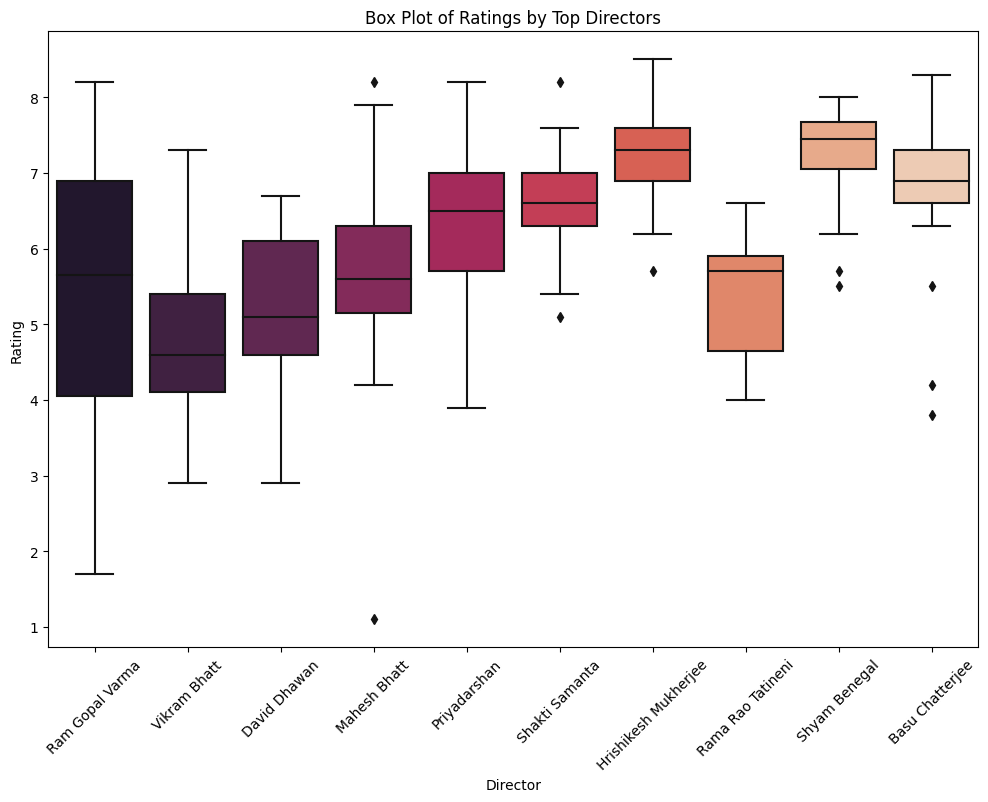

In [33]:
plt.figure(figsize=(12, 8))
TopDirectors=df['Director'].value_counts().index[0:10]
sns.boxplot(data=df[df['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='rocket')

plt.title('Box Plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

-- Ratings are positively affected by top directors like Hrishikesh Mukherjee and Shakti Samanta, who consistently receive higher median ratings.

-- directors like Ram Gopal Varma and Vikram Bhatt exhibit a wide range of ratings, indicating variable reception and less predictable quality

-- Notable outliers for directors like Mahesh Bhatt highlight significant deviations in their movie ratings

## Actor Influence on Ratings

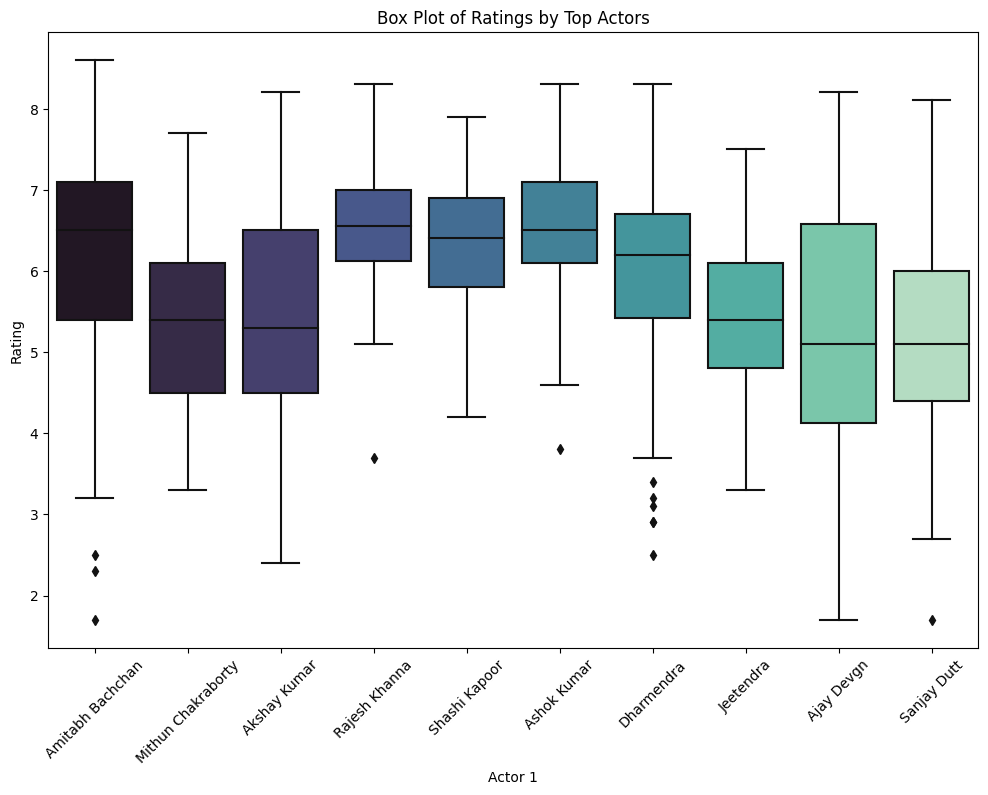

In [34]:
plt.figure(figsize=(12, 8))
TopActors = df['Actor 1'].value_counts().index[:10]
sns.boxplot(data=df[df['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='mako')

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

--Ratings are positively affected by top actors like Amitabh Bachchan and Shashi Kapoor, who consistently receive higher median ratings

-- Actors like Ajay Devgn and Sanjay Dutt show a wide range of ratings, indicating variable reception.

--Significant outliers for actors like Mithun Chakraborty and Dharmendra highlight notable deviations in their movie ratings.

## Genre Vs Rating pairplot

<Figure size 1500x1200 with 0 Axes>

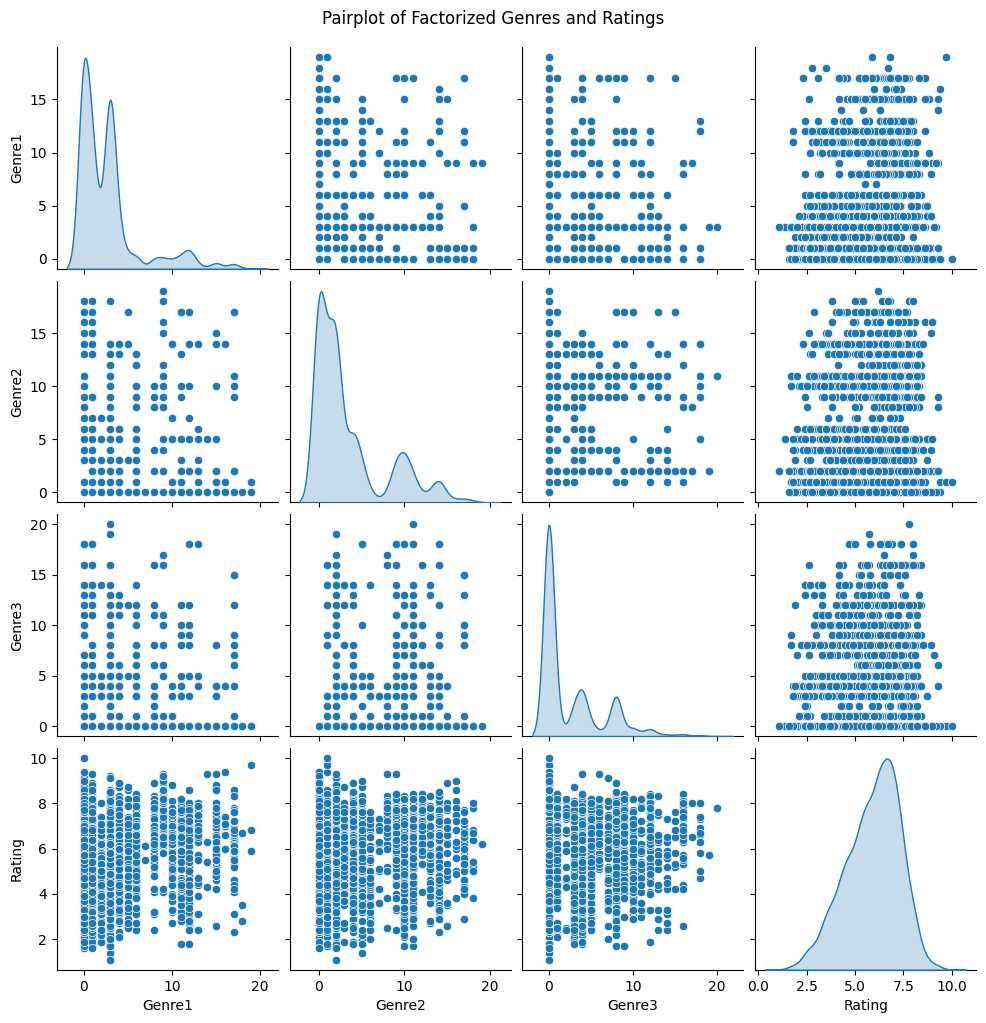

In [35]:
GenreColumns=['Genre1','Genre2','Genre3','Rating']
plt.figure(figsize=(15,12))
sns.pairplot(df[GenreColumns],diag_kind='kde',kind='scatter')

plt.suptitle('Pairplot of Factorized Genres and Ratings', y=1.02)
plt.show()

-- no single genre combination heavily influences the ratings.

-- The distribution of the Genre1 is heavily skewed towards a few dominant genres, while Genre2, Genre3 show more diverse but less frequent distributions.

## Distribution of Duration

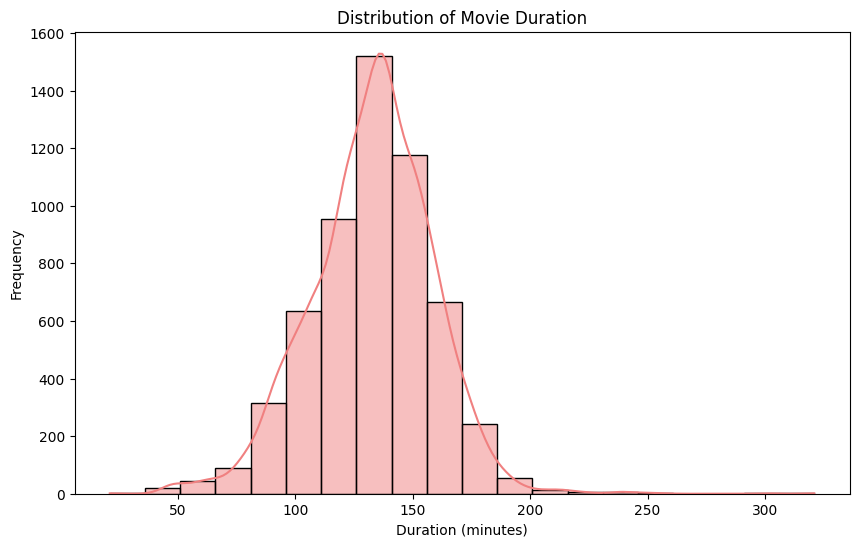

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df['Duration'],bins=20,kde=True,color='lightcoral')

plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

-- shows that the majority of movies have durations between 100 and 150 minutes

## Box Plot of Ratings by Year

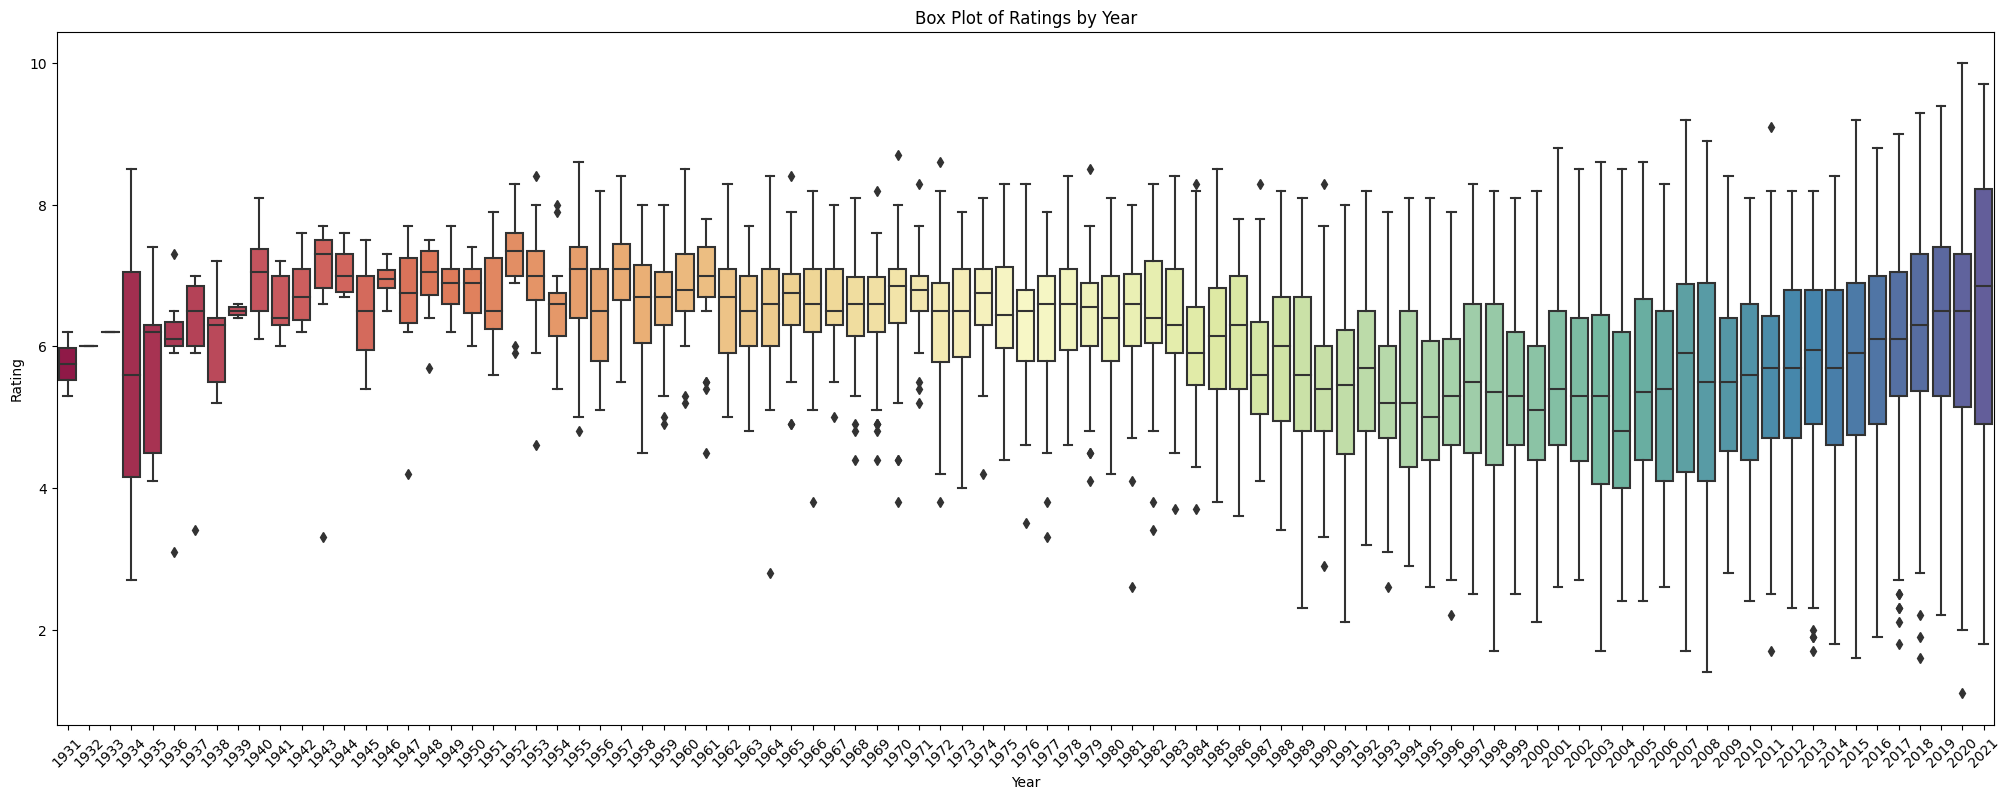

In [37]:
plt.figure(figsize=(25,9))
sns.boxplot(data=df,x='Year',y='Rating',palette='Spectral')
sns.dark_palette("#69d",reverse=True,as_cmap=True)
plt.title('Box Plot of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

-- There is a general upward trend in movie ratings over the years

-- Outliers are more in the earlier years.

## Votes Distribution

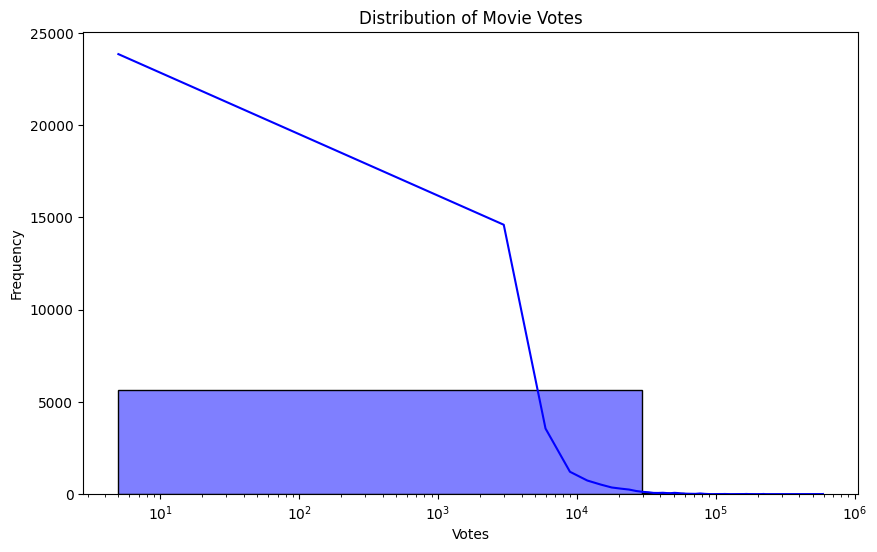

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['Votes'],bins=20,kde=True,color='blue')
plt.title('Distribution of Movie Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

-- Most movies received less number of votes

-- There is a rapid decline in frequency as the number of votes increases.

-- Very few movies received a high number of votes.

In [39]:
print(df.groupby("Genre1")["Rating"].mean())
print(df.groupby("Genre1")["Rating"].transform('mean'),1)


Genre1
0     6.254303
1     5.841793
2     4.687500
3     5.511158
4     6.132721
5     5.330435
6     6.181905
7     5.800000
8     6.697619
9     7.525316
10    5.883607
11    6.095556
12    5.612500
13    6.251613
14    6.320000
15    6.336364
16    7.225000
17    6.063043
18    4.333333
19    7.466667
Name: Rating, dtype: float64
1        6.254303
3        5.841793
5        5.841793
6        6.254303
8        4.687500
           ...   
15493    6.254303
15494    6.697619
15503    5.511158
15505    5.511158
15508    5.511158
Name: Rating, Length: 5746, dtype: float64 1


In [40]:
df['Genre1 encoded'] = round(df.groupby('Genre1')['Rating'].transform('mean'),1)
df['Genre2 encoded'] = round(df.groupby('Genre2')['Rating'].transform('mean'),1)
df['Genre3 encoded'] = round(df.groupby('Genre3')['Rating'].transform('mean'),1)
df['Votes encoded'] =  round(df.groupby('Votes')['Rating'].transform('mean'), 1)
df['Director encoded']=round(df.groupby('Director')['Rating'].transform('mean'), 1)
df['Actor 1 encoded']= round(df.groupby('Actor 1')['Rating'].transform('mean'), 1)
df

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,...,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0,5,...,2,2.197225,7.000000,6.850000,6.3,6.0,6.0,5.6,7.0,6.8
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0,5,...,5,3.583519,4.400000,5.420000,5.8,5.9,6.0,5.7,4.4,5.4
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1,27,...,18,6.719013,5.313333,4.788889,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,0,1,2,19,...,20,6.991177,7.383333,5.435000,6.3,5.9,6.3,7.4,7.4,5.4
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3,12,...,1,5.789960,5.600000,5.600000,4.7,5.7,5.7,6.6,5.6,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,Mozez Singh,Vicky Kaushal,0,0,0,9,...,4,6.013715,6.100000,6.725000,6.3,6.0,6.0,6.1,6.1,6.7
15494,2001,153,6.2,1496,Shyam Benegal,Karisma Kapoor,8,2,6,23,...,7,7.311218,7.250000,4.157143,6.7,5.9,7.0,6.2,7.2,4.2
15503,1989,125,5.8,44,S.P. Muthuraman,Chiranjeevi,3,4,8,35,...,13,3.806662,6.270000,6.307692,5.5,5.7,5.8,5.9,6.3,6.3
15505,1999,129,4.5,655,Kuku Kohli,Akshay Kumar,3,2,0,25,...,82,6.486161,5.225000,5.481707,5.5,5.9,6.0,5.9,5.2,5.5


In [41]:
df.drop(columns=['Genre1','Votes','Director','Actor 1','Genre2','Genre3'],inplace=True)
df['Rating'] =round(df['Rating'],1)

# Building the Model 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

## Train-Test Split

In [44]:
X=df.drop("Rating",axis=1)
Y=df["Rating"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# LINEAR REGRESSION

In [119]:
model=LinearRegression()
model.fit(X_train,Y_train)

Y_pred= model.predict(X_test)

mse =mean_squared_error(Y_test,Y_pred)  # mean-squared-error
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(Y_test,Y_pred)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE): 0.39
R-squared score: 0.79


## Decision Trees

In [120]:
model_DT=DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train,Y_train)
X_test_prediction_DT=model_DT.predict(X_test)

mse_DT =mean_squared_error(Y_test,X_test_prediction_DT)
print(f"Mean Squared Error (MSE): {mse_DT:.2f}")

r2_DT = r2_score(Y_test,X_test_prediction_DT)
print(f"R-squared score: {r2_DT:.2f}")

Mean Squared Error (MSE): 0.57
R-squared score: 0.69


## Random Forests

In [121]:
model_RF=RandomForestRegressor(n_estimators=100,random_state=50)
model_RF.fit(X_train,Y_train)
X_test_prediction_RF=model_RF.predict(X_test)

mse_RF =mean_squared_error(Y_test,X_test_prediction_RF)
print(f"Mean Squared Error (MSE): {mse_RF:.2f}")

r2_RF = r2_score(Y_test,X_test_prediction_RF)
print(f"R-squared score: {r2_RF:.2f}")

Mean Squared Error (MSE): 0.30
R-squared score: 0.84


## Gradient Boosting

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_GB = GradientBoostingRegressor(n_estimators=100,random_state=50)
model_GB.fit(X_train,Y_train)
X_test_prediction_GB=model_GB.predict(X_test)

mse_GB =mean_squared_error(Y_test,X_test_prediction_GB)
print(f"Mean Squared Error (MSE): {mse_GB:.2f}")

r2_GB= r2_score(Y_test,X_test_prediction_GB)
print(f"R-squared score: {r2_GB:.2f}")

Mean Squared Error (MSE): 0.32
R-squared score: 0.82


## Support Vector Machines (SVM)

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_SVR = SVR(kernel='linear',C=1.0,epsilon=0.1,gamma='scale')
model_SVR.fit(X_train,Y_train)
X_test_prediction_SVR=model_SVR.predict(X_test)

mse_SVR =mean_squared_error(Y_test,X_test_prediction_SVR)
print(f"Mean Squared Error (MSE): {mse_SVR:.2f}")

r2_SVR= r2_score(Y_test,X_test_prediction_SVR)
print(f"R-squared score: {r2_SVR:.2f}")

Mean Squared Error (MSE): 0.86
R-squared score: 0.53


## Results of all models

In [124]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting', 
              'Support Vector Machine'],
    'Mean Squared Error (MSE)': [mse*100,mse_DT*100,mse_RF*100, mse_GB*100,mse_SVR*100],
    'R-squared score (R2)':     [r2*100, r2_DT*100,r2_RF*100,r2_GB*100,r2_SVR*100]
})
print(results)

                    Model  Mean Squared Error (MSE)  R-squared score (R2)
0       Linear Regression                 38.704687             78.713526
1           Decision Tree                 56.621434             68.859826
2           Random Forest                 29.774935             83.624635
3       Gradient Boosting                 31.634607             81.598710
4  Support Vector Machine                 85.905970             53.253507


## Comparision of Results.

In [48]:
models = results['Model']
mse_scores = results['Mean Squared Error (MSE)'].round(2)
r2_scores = results['R-squared score (R2)'].round(2)
num_models = len(models)
bar_width = 0.35
index = np.arange(num_models)

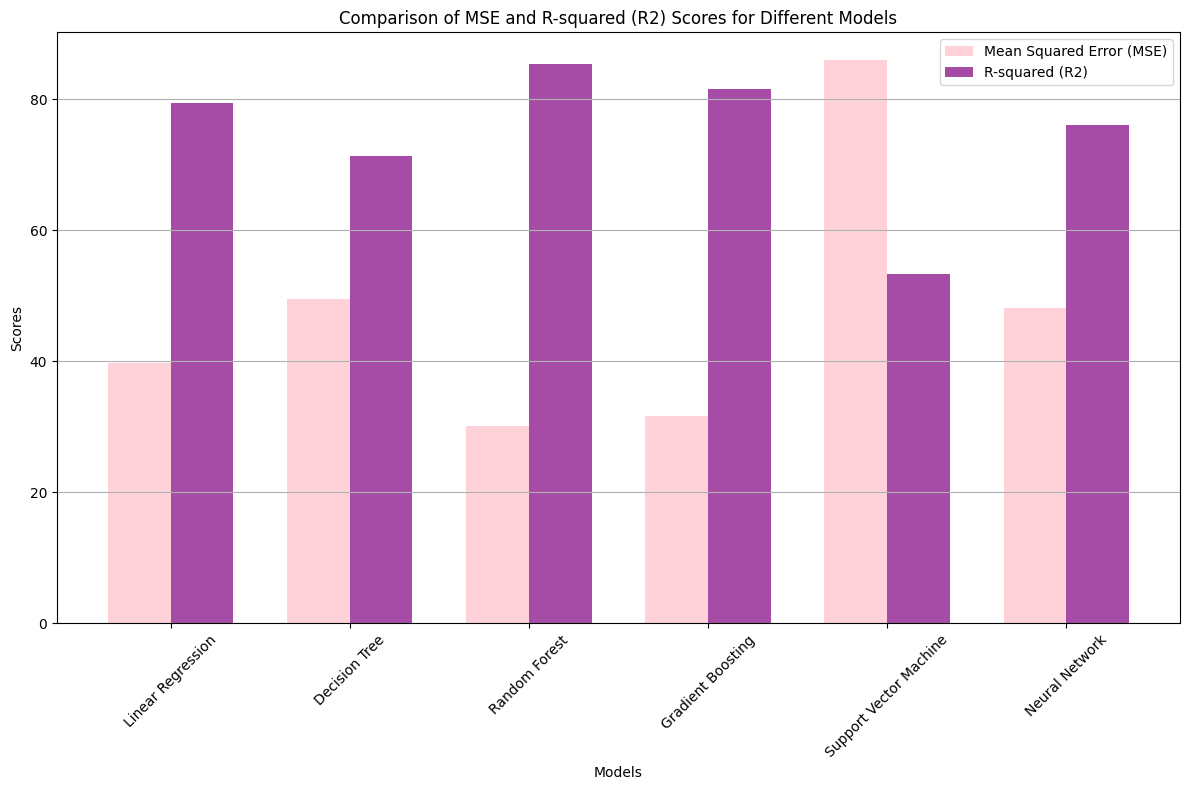

In [49]:
plt.figure(figsize=(12, 8))

plt.bar(index,mse_scores,bar_width,label='Mean Squared Error (MSE)',color='pink',alpha=0.7)
plt.bar(index +bar_width,r2_scores, bar_width,label='R-squared (R2)',color='purple',alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of MSE and R-squared (R2) Scores for Different Models')
plt.xticks(index +bar_width/2,models,rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()